# IIVP - Project 1
### 6252320 - Leon Debnath

Import the required modules for the notebook

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import cv2
import math

In [2]:
def display(images, labels, axis='off', cmap=None, figsize=(15,10)):
    
    if len(images) != len(labels):
        raise Exception("images and labels don't correspond")
        
    fig = plt.figure(figsize=figsize)
    cols = 2
    rows = math.ceil(len(images)/2)
    
    for i in range(len(images)):
        fig.add_subplot(rows, cols, i+1)
        plt.imshow(images[i], cmap=cmap)
        plt.title(labels[i])
        plt.axis(axis)

## Exercise 1

## Exercise 2

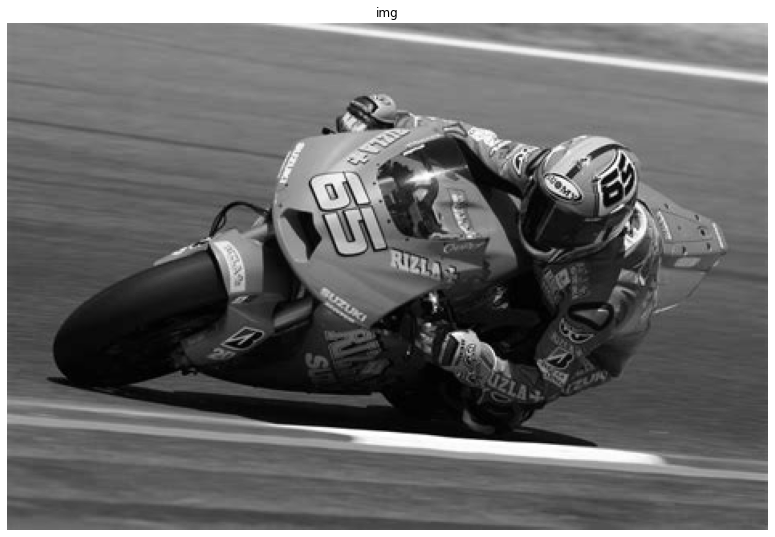

In [3]:
from scipy import fftpack
from numpy import pi
from numpy import r_

img = cv2.cvtColor(cv2.imread('images/motogp.jpeg'), cv2.COLOR_BGR2GRAY)

display([img],['img'], cmap='gray', figsize=(30,10))

## 2.1 Watermark Insertion

In [4]:
def dct2(a):
    return fftpack.dct( fftpack.dct( a.T, norm='ortho' ).T, norm='ortho' )


def dct(img, block_size=8):
    
    dct = np.zeros(img.shape)

    for i in r_[:img.shape[0]: block_size]:
        for j in r_[:img.shape[1]: block_size]:
            dct[i: i + block_size, j: j + block_size] = dct2(img[i:i+ block_size, j: j+ block_size])
            
    return dct

In [5]:
def idct2(a):
    return fftpack.idct( fftpack.idct( a.T , norm='ortho').T,norm='ortho')        
        
def idct(img_dct, block_size=8):
    
    img = np.zeros(img_dct.shape)
    
    for i in r_[:img.shape[0]: block_size]:
        for j in r_[:img.shape[1]: block_size]:
            img[i:(i + block_size), j:(j + block_size)] = idct2( img_dct[i:(i + block_size),j:(j + block_size)])
    
    return img

In [6]:
def apply_threshold(img_dct, threshold):
    
    return img_dct * (abs(img_dct) > (threshold * np.max(img_dct)))
    

### 2.1.1 Compute the 2-D DCT

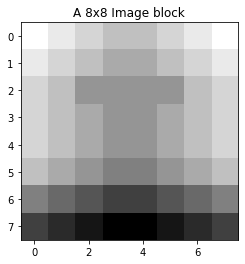

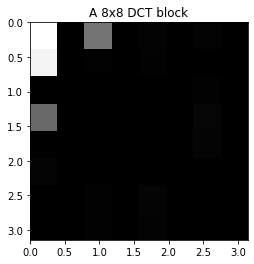

In [31]:
pos = 0
block_size=8

img_dct = dct(img)

# Extract a block from image
plt.figure()
plt.imshow(img[pos: pos + block_size, pos: pos + block_size], cmap='gray')
plt.title(f"A {block_size}x{block_size} Image block")

# Display the dct of that block
plt.figure()
plt.imshow(img_dct[pos: pos + block_size, pos: pos + block_size],
           cmap='gray',
           vmax=np.max(img_dct) * 0.01,
           vmin=0,
           extent=[0,pi,pi,0])

plt.title(f"A {block_size}x{block_size} DCT block");

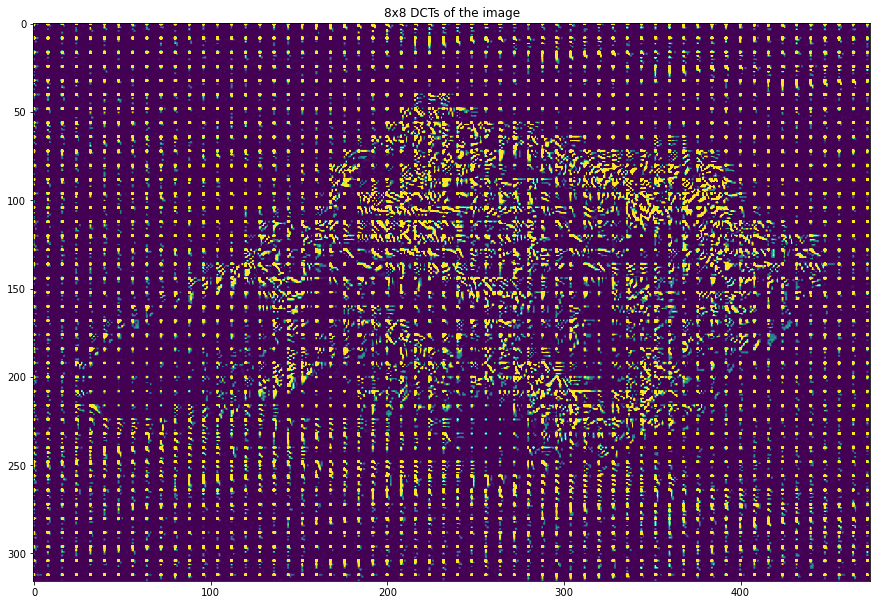

In [32]:
# Display entire DCT
plt.figure(figsize=(15,15))
plt.imshow(img_dct, vmax = np.max(img_dct)*0.01, vmin = 0)
plt.title( "8x8 DCTs of the image");

### 2.1.2 Choose the $K$ Largest Coeficients 

In [33]:
x = [x * 0.0005 for x in range(1, 50)]
thresholds = {}
coeficients = {}

for key in x:
    thresholds[key] = apply_threshold(img_dct, key)
    coeficients[key] = 100 * np.sum(thresholds[key] != 0.0 ) / (img.shape[0] * img.shape[1] * 1.0)
    
    
# keys = list(thresholds.keys())
# imgs = list(thresholds.values())
# display(imgs, keys, cmap='gray', figsize=(15,25))

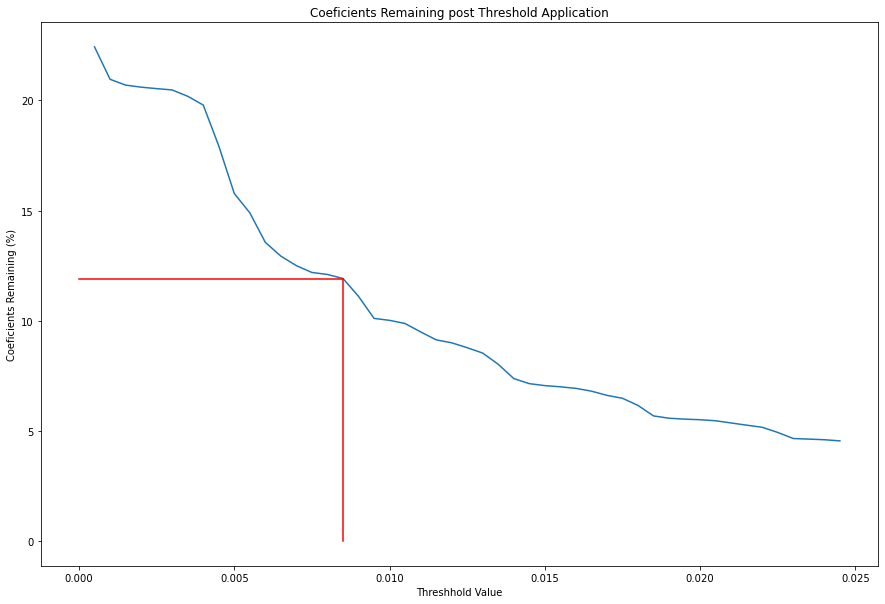

In [34]:
plt.figure(figsize=(15,10))
plt.plot(list(coeficients.keys()), list(coeficients.values()))
plt.plot([0.0085, 0.0085],[0, 11.9], 'r')
plt.plot([0, 0.0085],[11.9, 11.9], 'r')
plt.title('Coeficients Remaining post Threshold Application')
plt.xlabel('Threshhold Value')
plt.ylabel('Coeficients Remaining (%)');

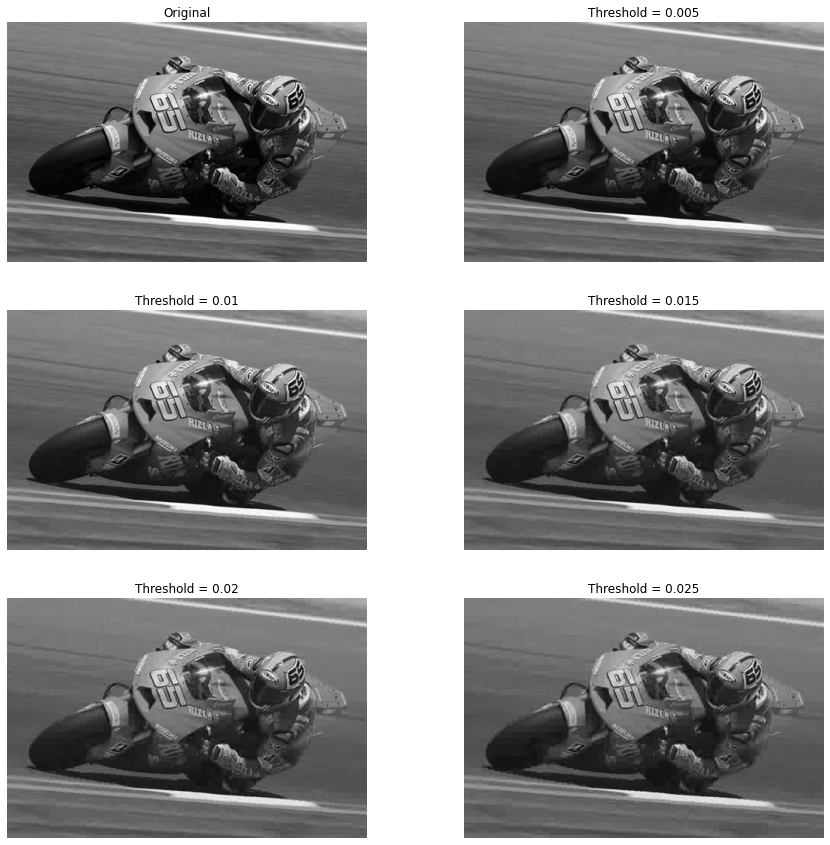

In [35]:
transformed = idct(apply_threshold(img_dct, 0.001))

display([img, 
         idct(apply_threshold(img_dct, 0.005)),
         idct(apply_threshold(img_dct, 0.01)),
         idct(apply_threshold(img_dct, 0.015)),
         idct(apply_threshold(img_dct, 0.02)),
         idct(apply_threshold(img_dct, 0.025))],
        ['Original',
         'Threshold = 0.005',
         'Threshold = 0.01',
         'Threshold = 0.015',
         'Threshold = 0.02',
         'Threshold = 0.025'],
        figsize=(15,15),
        cmap='gray')

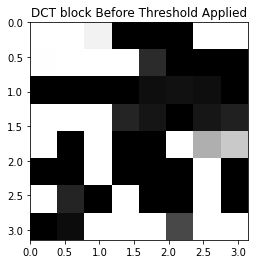

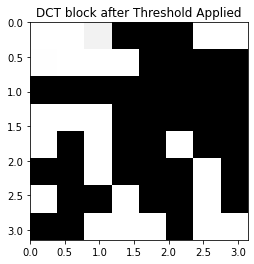

In [101]:
x_pos = 100
y_pos = 200
block_size=8

img_dct = dct(img)

# Display the dct of that block
plt.figure()
plt.imshow(img_dct[x_pos: x_pos + block_size, y_pos: y_pos + block_size],
           cmap='gray',
           vmax=np.max(img_dct) * 0.01,
           vmin=0,
           extent=[0,pi,pi,0])
plt.title(f"DCT block Before Threshold Applied");

img_dct_t = apply_threshold(img_dct, 0.0085)

# Display the dct of that block
plt.figure()
plt.imshow(img_dct_t[x_pos: x_pos + block_size, y_pos: y_pos + block_size],
           cmap='gray',
           vmax=np.max(img_dct) * 0.01,
           vmin=0,
           extent=[0,pi,pi,0])

plt.title(f"DCT block after Threshold Applied");

# Calculate k
k = np.sum(img_dct_t != 0)

### 2.1.3 Create a watermark

In [102]:
mu = 0
sigma = 1
alpha = 0.0000000000000000000000000000000000000000001
threshold = 0.085

# The coeficients for the watermark
gaussian = alpha * np.random.default_rng().normal()

print(gaussian)

1.4927243728810747e-43


In [103]:
def apply_gaussian(block):
    
    out = np.zeros(block.shape)
    
    for i in range(block.shape[0]):
        for j in range(block.shape[1]):
            
            if abs(block[i, j]) != 0:
                    out[i, j] = block[i, j] + (alpha * np.random.default_rng().normal())
                            
    out[0, 0] = block[0, 0]
    
    print(f"block {block}")
    print(f"out {out}")
    
    return out

In [104]:
watermark = img_dct_t

plt.figure(figsize=(15,15))
plt.imshow(watermark, cmap='gray')

for i in r_[:watermark.shape[0]: block_size]:
    for j in r_[:watermark.shape[1]: block_size]:
        
        watermark[i:(i + block_size), j:(j + block_size)] = apply_gaussian(watermark[i:(i + block_size), j:(j + block_size)])
        
            
plt.figure(figsize=(15,15))
plt.imshow(watermark, cmap='gray')

block [[1034.75          0.            0.            0.            0.
     0.            0.            0.        ]
 [  18.95200784    0.            0.            0.            0.
     0.           -0.            0.        ]
 [  -0.            0.           -0.            0.           -0.
     0.            0.            0.        ]
 [   0.            0.           -0.            0.           -0.
     0.            0.            0.        ]
 [  -0.            0.           -0.            0.           -0.
     0.            0.            0.        ]
 [   0.            0.            0.            0.            0.
     0.           -0.            0.        ]
 [  -0.            0.            0.            0.            0.
     0.           -0.            0.        ]
 [  -0.            0.            0.            0.            0.
     0.           -0.            0.        ]]
out [[1034.75          0.            0.            0.            0.
     0.            0.            0.        ]
 [  18.9

block [[1133.75        -27.68199844   -0.            0.            0.
     0.            0.           -0.        ]
 [ 126.6739989   -26.74707525    0.           -0.            0.
     0.            0.           -0.        ]
 [  83.57195272  -17.72928512    0.            0.           -0.
    -0.            0.            0.        ]
 [  53.79746858   -0.            0.           -0.            0.
     0.           -0.            0.        ]
 [  35.75         -0.            0.           -0.           -0.
     0.            0.            0.        ]
 [  21.65110176    0.            0.           -0.            0.
     0.           -0.            0.        ]
 [   0.            0.           -0.            0.            0.
     0.            0.            0.        ]
 [   0.           -0.            0.            0.            0.
    -0.            0.            0.        ]]
out [[1133.75        -27.68199844    0.            0.            0.
     0.            0.            0.        ]
 [ 126.6

block [[397.25        71.92483157  18.19339436   0.           0.
   -0.          -0.           0.        ]
 [162.26337684  90.10466484  17.87654099   0.          -0.
   -0.           0.          -0.        ]
 [104.59302838  62.95341382   0.           0.          -0.
    0.          -0.           0.        ]
 [ 81.67687988  44.45984519   0.          -0.          -0.
    0.          -0.           0.        ]
 [ 54.25        26.8684763   -0.          -0.          -0.
   -0.          -0.          -0.        ]
 [ 32.88726034   0.          -0.           0.          -0.
   -0.           0.          -0.        ]
 [  0.          -0.         -18.54594155  -0.          -0.
    0.           0.           0.        ]
 [  0.          -0.         -22.05187214  -0.          -0.
    0.          -0.          -0.        ]]
out [[397.25        71.92483157  18.19339436   0.           0.
    0.           0.           0.        ]
 [162.26337684  90.10466484  17.87654099   0.           0.
    0.           0.  

    -0.           -0.           -0.        ]]
out [[1068.5          72.04904029   17.66462996  -35.20804647   35.75
    35.51628195    0.            0.        ]
 [ -18.1715517   -90.10631846    0.            0.          -45.14099173
   -24.03211058  -23.77083997    0.        ]
 [ -70.24932326  -27.01203255    0.           26.98563702    0.
     0.            0.            0.        ]
 [  45.09986924    0.            0.            0.            0.
   -28.71760006    0.            0.        ]
 [ -27.5           0.            0.            0.            0.
     0.            0.            0.        ]
 [   0.          -24.10371924    0.           36.98608857   40.54908251
     0.            0.            0.        ]
 [   0.            0.            0.            0.            0.
     0.            0.            0.        ]
 [  18.23602407    0.          -21.83034228    0.            0.
     0.            0.            0.        ]]
block [[1002.625        88.59378593  -61.95281341   34.0026

block [[ 816.25       -126.3277904    97.90568371    0.         -107.25
   -35.10457825   -0.           -0.        ]
 [  44.20680979 -233.05856406   26.39912396  116.36951404  -17.38456832
   -83.55862567   -0.           28.26899031]
 [  41.1346863    34.97437087  -61.88414498   54.15102864  109.13035342
   -33.3412819   -36.98249455   -0.        ]
 [ -53.65219807   54.83372451  -21.65049001  -42.59172186    0.
    27.7823594   -30.94463207  -24.01701356]
 [  79.5         -98.1441628    22.57502302    0.            0.
    26.77767508    0.            0.        ]
 [ -31.7083683    59.04355567   -0.            0.           40.28080044
     0.           -0.           -0.        ]
 [   0.            0.          -19.23249455   -0.            0.
    -0.           -0.           -0.        ]
 [  18.79239181  -25.46287292   21.81334102    0.           -0.
     0.           -0.           -0.        ]]
out [[ 816.25       -126.3277904    97.90568371    0.         -107.25
   -35.10457825    0.    

block [[288.375        0.           0.          -0.          -0.
   -0.          -0.           0.        ]
 [ 88.65936884   0.          -0.          -0.          -0.
   -0.           0.          -0.        ]
 [-47.61063356   0.          -0.          -0.          -0.
   -0.          -0.          -0.        ]
 [ 34.62050858  -0.          -0.          -0.          -0.
   -0.          -0.          -0.        ]
 [-17.375       -0.          -0.           0.           0.
    0.           0.          -0.        ]
 [ -0.          -0.          -0.           0.          -0.
   -0.           0.           0.        ]
 [  0.          -0.          -0.           0.           0.
   -0.          -0.          -0.        ]
 [ -0.          -0.          -0.           0.           0.
    0.           0.          -0.        ]]
out [[288.375        0.           0.           0.           0.
    0.           0.           0.        ]
 [ 88.65936884   0.           0.           0.           0.
    0.           0.  

block [[627.875   0.     -0.     -0.      0.      0.     -0.      0.   ]
 [  0.     -0.     -0.      0.      0.     -0.     -0.     -0.   ]
 [  0.     -0.     -0.     -0.      0.     -0.      0.      0.   ]
 [  0.      0.     -0.     -0.      0.      0.      0.      0.   ]
 [-18.125  -0.     -0.      0.     -0.     -0.      0.     -0.   ]
 [  0.      0.     -0.      0.     -0.      0.     -0.      0.   ]
 [  0.     -0.     -0.     -0.      0.     -0.      0.     -0.   ]
 [  0.      0.      0.     -0.     -0.      0.      0.      0.   ]]
out [[627.875   0.      0.      0.      0.      0.      0.      0.   ]
 [  0.      0.      0.      0.      0.      0.      0.      0.   ]
 [  0.      0.      0.      0.      0.      0.      0.      0.   ]
 [  0.      0.      0.      0.      0.      0.      0.      0.   ]
 [-18.125   0.      0.      0.      0.      0.      0.      0.   ]
 [  0.      0.      0.      0.      0.      0.      0.      0.   ]
 [  0.      0.      0.      0.      0.      0.     

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



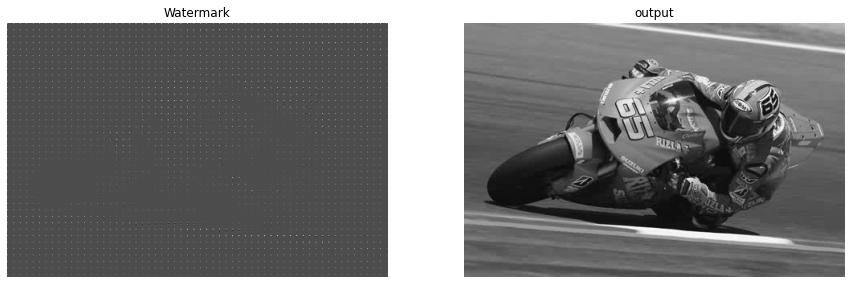

In [105]:

display([watermark, idct(watermark)],
        ['Watermark', 'output'], cmap='gray')